In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from src.utils import get_wandb_summaries
from src.visualization.visualize import bars_with_labels_and_errors, draw_cd_diagram
import numpy as np

%load_ext autoreload 
%autoreload 2

In [3]:
runs = [
        # "1szazbm1",
        "19h7xs81",

        "20gczthf",
        # "3g83xe10",
        "1ke6xden",
        # "301fj0y2",
        "1x254xwv",
        "289402rh",
        "2911eip8",
        # "2czots5t",
        "21ebfhh3",
        "23qp4fss",
        "2ix8tob4",
        # "1e5ddrbv",
        "7r8nxjo5",
        "z0nbehr0",
        "2ncle1v9",
        "3ss14njj",
        "1apcb94k", # CNN Models
        "ko9zy18b",
        "2irztt2o",
        "27eeg42m",
        "9kq7490z",
        "eq4g39ub", # More CNN Transformer
        "1g7it1lr"
    ]
    
summaries = get_wandb_summaries(runs)

In [4]:
summaries_df = pd.DataFrame(summaries)
summaries_df["multitask"] = summaries_df["command"].str.contains("pretrained_predict_daily_features.ckpt")

is_multitask = summaries_df[summaries_df["multitask"]]
summaries_df.loc[summaries_df["multitask"],"model"] = is_multitask["model"] + " - Daily Features Multitask"

summaries_df["test/roc_ci"] = list(zip(summaries_df['test/roc_auc_ci_low'], summaries_df['test/roc_auc_ci_high']))

In [5]:
summaries_df[["id","model","task","test/roc_auc","test/roc_auc_ci_low"]].sort_values("task")

,id,model,task,test/roc_auc,test/roc_auc_ci_low
14,ko9zy18b,CNN,PredictFluPos,0.859530,0.797333
11,2ncle1v9,CNNToTransformerEncoder,PredictFluPos,0.883975,0.835983
9,7r8nxjo5,XGBoost,PredictFluPos,0.708416,0.648562
0,19h7xs81,XGBoost,PredictSurveyCol-(symptom_severity__q_fatigue_...,0.707549,0.691462
17,9kq7490z,CNN,PredictSurveyCol-(symptom_severity__q_fatigue_...,0.699181,0.673625
7,23qp4fss,CNNToTransformerEncoder - Daily Features Multi...,PredictSurveyCol-(symptom_severity__q_fatigue_...,0.758492,0.739412
8,2ix8tob4,CNNToTransformerEncoder,PredictSurveyCol-(symptom_severity__q_fatigue_...,0.712649,0.694916
5,2911eip8,CNNToTransformerEncoder,PredictSurveyCol-have_flu > 0,0.639795,0.626557
4,289402rh,CNNToTransformerEncoder - Daily Features Multi...,PredictSurveyCol-have_flu > 0,0.671006,0.657956
3,1x254xwv,XGBoost,PredictSurveyCol-have_flu > 0,0.647025,0.636278


In [6]:
manual_adjustments = {
    "3ss14njj":[("multitask",True),("task","PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")],
    "z0nbehr0":[("multitask",True),("task","PredictFluPos"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")]
}
for run_id, changes in manual_adjustments.items():
    for k,v in changes:
        summaries_df.loc[summaries_df["id"] == run_id,k] = v



OLD_TASK_NAMES = [ 'PredictFluPos',
                  'PredictSurveyCol-have_flu > 0', 
                 'PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0',
                 'PredictSurveyCol-symptom_severity__fever_q_3 > 0 | symptom_severity__fever_q_2 > 0',
                 'PredictSurveyCol-(symptom_severity__q_fatigue_2 > 0) | (symptom_severity__q_fatigue_3 > 0)']

NEW_TASK_NAMES = [ 'Flu Positivity',
                  'Two or More\nFlu Symptoms',
                  'Severe Cough',
                  'Severe Fever',
                  'Severe Fatigue']

task_name_map = dict(zip(OLD_TASK_NAMES,NEW_TASK_NAMES))
summaries_df["task"] = summaries_df["task"].map(task_name_map)


summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [7]:
summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [8]:

# all_categories = pd.MultiIndex.from_product([summaries_df["task"].unique(),summaries_df["model"].unique()], names=('task','model'))
# summaries_df = summaries_df.set_index(["task","model"])
# summaries_df = summaries_df.reindex(all_categories).reset_index()

In [9]:
summaries_df

,test/pr_auc_ci_low,test/pr_auc_ci_high,eval/roc_auc,test/roc_auc,test_predictions,test/roc_auc_ci_low,test/roc_auc_ci_high,task,_timestamp,test/pr_auc,...,eval/pr_auc_ci_low,train/best_roc_auc,trainer/global_step,test/det_table,eval/best_pr_auc,train/best_pr_auc,multitask,test/roc_ci,roc_ci,pr_ci
0,0.026340,0.039844,0.706449,0.707549,"{'_type': 'table-file', 'ncols': 4, 'nrows': 1...",0.691462,0.723507,Severe Fatigue,1643070408,0.032206,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6914617368640869, 0.7235068701632916)",0.016087,0.007638
1,0.027517,0.084715,0.766600,0.817656,{'path': 'media/table/test_predictions_3682_01...,0.781133,0.854178,Severe Fever,1643584351,0.056116,...,0.028935,0.935621,8996.0,{'artifact_path': 'wandb-client-artifact://atu...,0.033269,0.272307,True,"(0.7811334133148193, 0.8541783094406128)",0.036522,0.028599
2,0.009471,0.019318,0.716579,0.740792,{'artifact_path': 'wandb-client-artifact://187...,0.705326,0.774476,Severe Fever,1643068076,0.013313,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.7053255932119042, 0.7744761940195568)",0.035466,0.006005
3,0.040145,0.049433,0.637857,0.647025,{'sha256': '57268ce726ccb38f9773096835f22908d4...,0.636278,0.657473,Two or More\nFlu Symptoms,1643066915,0.044323,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6362778317460756, 0.6574727516954003)",0.010747,0.005110
4,0.057680,0.074592,0.662854,0.671006,"{'_type': 'table-file', 'ncols': 4, 'nrows': 1...",0.657956,0.684057,Two or More\nFlu Symptoms,1643220486,0.066136,...,0.047414,0.799689,11246.0,"{'nrows': 9999, 'sha256': 'eb8a995dd54ed3bb2bc...",0.048992,0.215786,True,"(0.6579557657241821, 0.6840571165084839)",0.013051,0.008456
5,0.036396,0.047999,0.611394,0.639795,"{'_type': 'table-file', 'ncols': 4, 'nrows': 1...",0.626557,0.653032,Two or More\nFlu Symptoms,1643656995,0.042198,...,0.032352,0.817021,8996.0,"{'size': 546913, '_type': 'table-file', 'ncols...",0.032985,0.207093,False,"(0.6265571117401123, 0.6530319452285767)",0.013237,0.005801
6,0.015181,0.022775,0.690364,0.703520,{'path': 'media/table/test_predictions_14_d5f8...,0.684066,0.722670,Severe Cough,1643069232,0.018289,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6840661389870446, 0.7226702290513877)",0.019454,0.004487
7,0.054282,0.094238,0.726669,0.758492,"{'ncols': 4, 'nrows': 114984, 'sha256': '3d74f...",0.739412,0.777572,Severe Fatigue,1643840066,0.074260,...,0.031703,0.834527,8996.0,{'path': 'media/table/test/det_table_3681_f2c3...,0.033523,0.169936,True,"(0.7394120693206787, 0.7775715589523315)",0.019080,0.019978
8,0.030250,0.046479,0.668750,0.712649,NaN,0.694916,0.730383,Severe Fatigue,1642047551,0.038365,...,0.020373,0.874030,9446.0,"{'ncols': 3, 'nrows': 9999, 'sha256': '616531a...",0.021685,0.233373,False,"(0.6949158310890198, 0.7303827404975891)",0.017733,0.008115
9,0.000836,0.011328,0.693985,0.708416,{'path': 'media/table/test_predictions_14_70eb...,0.648562,0.766294,Flu Positivity,1643065736,0.002662,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6485623229886598, 0.766294256312942)",0.059854,0.008666


In [10]:
OLD_MODEL_NAMES = ["XGBoost",
               "CNN",
               "CNNToTransformerEncoder",
               "CNNToTransformerEncoder - Daily Features Multitask",
]

NEW_MODEL_NAMES = [
    "XGBoost",
    "CNN",
    "CNN-Transformer",
    "Our Model",
]
model_name_map = dict(zip(OLD_MODEL_NAMES,NEW_MODEL_NAMES))
model_order_map = lambda x: NEW_MODEL_NAMES.index(x)
summaries_df["model_clean"] = summaries_df["model"].map(model_name_map)
summaries_df = summaries_df.sort_values(by="model_clean",key=lambda x: x.map(model_order_map))

In [11]:

metrics = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["test/pr_auc","test/roc_auc"], value_name="metric_val")

pr_cis = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["pr_ci"], value_name="ci")
pr_cis["variable"] = "test/pr_auc"

roc_cis = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["roc_ci"], value_name="ci")
roc_cis["variable"] = "test/roc_auc"
cis = pd.concat([pr_cis,roc_cis])

metrics = pd.merge(metrics,cis)
metrics["variable"] = metrics["variable"].map({"test/roc_auc":"ROC AUC",
                                            "test/pr_auc": "PR AUC"})

02/07/2022 10:26:23 - WARNING - matplotlib.font_manager -   findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
02/07/2022 10:26:23 - WARNING - matplotlib.font_manager -   findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


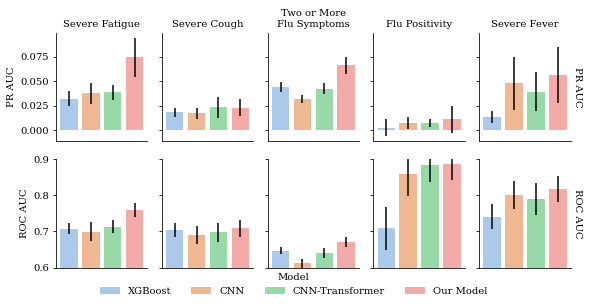

In [12]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
def add_error_bars(x,y,errors,**kwargs):
    plt.errorbar(x,y,yerr=errors, color="black")
    
with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    g = (sns.FacetGrid(metrics, col="task",row="variable", hue= "model_clean", height=2, aspect=0.3, palette="pastel",
                    sharey="row", margin_titles=True)
        .map(sns.barplot,'model_clean','metric_val', order=NEW_MODEL_NAMES)
        .map(add_error_bars,'model_clean','metric_val',"ci")
        .set_titles(col_template="{col_name}", row_template="{row_name}")
        .set_axis_labels("", "")
        .set_xticklabels("")
        .set(xticks=[])
        .add_legend(loc='center',bbox_to_anchor=(.5, 0.0),ncol=len(NEW_MODEL_NAMES),title="Model", shadow=True))

    g.axes[0][0].set_ylabel("PR AUC")
    g.axes[1][0].set_ylabel("ROC AUC")
    [x.set_ylim([0.6,0.9]) for x in g.axes[1]]
    plt.tight_layout()

In [13]:
pretty_table = (metrics.pivot(index=["model_clean","variable"], columns=["task"], values=["metric_val"]).unstack(1).round(3)
                    .sort_values(by="model_clean",key=lambda x: x.map(model_order_map)))                    
pretty_table

metric_val                                              \
task            Flu Positivity         Severe Cough         Severe Fatigue   
variable                PR AUC ROC AUC       PR AUC ROC AUC         PR AUC   
model_clean                                                                  
XGBoost                  0.003   0.708        0.018   0.704          0.032   
CNN                      0.007   0.860        0.017   0.690          0.038   
CNN-Transformer          0.007   0.884        0.023   0.697          0.038   
Our Model                0.011   0.887        0.023   0.708          0.074   

                                                                                
task                    Severe Fever         Two or More\nFlu Symptoms          
variable        ROC AUC       PR AUC ROC AUC                    PR AUC ROC AUC  
model_clean                                                                     
XGBoost           0.708        0.013   0.741                     0.044   0.647  
CNN               0.699        0.048   0.801                     0.032   0.612  
CNN-Transformer   0.713        0.039   0.790                     0.042   0.640  
Our Model         0.758        0.056   0.818                     0.066   0.671

In [25]:
pretty_table.T

model_clean                                    XGBoost    CNN  \
           task                      variable                   
metric_val Flu Positivity            PR AUC      0.003  0.007   
                                     ROC AUC     0.708  0.860   
           Severe Cough              PR AUC      0.018  0.017   
                                     ROC AUC     0.704  0.690   
           Severe Fatigue            PR AUC      0.032  0.038   
                                     ROC AUC     0.708  0.699   
           Severe Fever              PR AUC      0.013  0.048   
                                     ROC AUC     0.741  0.801   
           Two or More\nFlu Symptoms PR AUC      0.044  0.032   
                                     ROC AUC     0.647  0.612   

model_clean                                    CNN-Transformer  Our Model  
           task                      variable                              
metric_val Flu Positivity            PR AUC              0.007      0.011  
                                     ROC AUC             0.884      0.887  
           Severe Cough              PR AUC              0.023      0.023  
                                     ROC AUC             0.697      0.708  
           Severe Fatigue            PR AUC              0.038      0.074  
                                     ROC AUC             0.713      0.758  
           Severe Fever              PR AUC              0.039      0.056  
                                     ROC AUC             0.790      0.818  
           Two or More\nFlu Symptoms PR AUC              0.042      0.066  
                                     ROC AUC             0.640      0.671

In [26]:
print(pretty_table.T.to_latex(index_names=True))

\begin{tabular}{lllrrrr}
\toprule
           &                           & model\_clean &  XGBoost &    CNN &  CNN-Transformer &  Our Model \\
{} & task & variable &          &        &                  &            \\
\midrule
metric\_val & Flu Positivity & PR AUC &    0.003 &  0.007 &            0.007 &      0.011 \\
           &                           & ROC AUC &    0.708 &  0.860 &            0.884 &      0.887 \\
           & Severe Cough & PR AUC &    0.018 &  0.017 &            0.023 &      0.023 \\
           &                           & ROC AUC &    0.704 &  0.690 &            0.697 &      0.708 \\
           & Severe Fatigue & PR AUC &    0.032 &  0.038 &            0.038 &      0.074 \\
           &                           & ROC AUC &    0.708 &  0.699 &            0.713 &      0.758 \\
           & Severe Fever & PR AUC &    0.013 &  0.048 &            0.039 &      0.056 \\
           &                           & ROC AUC &    0.741 &  0.801 &            0.790 &      

## Critical Difference Diagrams:

In [15]:



to_cd_diag  = summaries_df.rename(columns={"task":"dataset_name",
                                            "test/pr_auc":"accuracy",
                                            "model_clean":"classifier_name"})

to_cd_diag = to_cd_diag.set_index(["dataset_name","classifier_name"])        

to_cd_diag.loc[("Two or More\nFlu Symptoms","CNN-Transformer"),"accuracy"] = 0.037
to_cd_diag.loc[("Severe Cough","CNN-Transformer"),"accuracy"] = 0.011
to_cd_diag.loc[("Severe Fatigue","CNN-Transformer"),"accuracy"] = 0.039
to_cd_diag.loc[("Severe Fever","CNN-Transformer"),"accuracy"] = 0.042
to_cd_diag.loc[("Flu Positivity","CNN-Transformer"),"accuracy"] = 0.009


to_cd_diag.loc[("Two or More\nFlu Symptoms","CNN"),"accuracy"] = 0.0244
to_cd_diag.loc[("Severe Cough","CNN"),"accuracy"] = 0.0080
to_cd_diag.loc[("Severe Fatigue","CNN"),"accuracy"] = 0.016
to_cd_diag.loc[("Severe Fever","CNN"),"accuracy"] = 0.015
to_cd_diag.loc[("Flu Positivity","CNN"),"accuracy"] = 0.002



In [16]:
to_cd_diag[["accuracy"]]

,,accuracy
dataset_name,classifier_name,
Severe Fatigue,XGBoost,0.032206
Severe Cough,XGBoost,0.018289
Two or More\nFlu Symptoms,XGBoost,0.044323
Flu Positivity,XGBoost,0.002662
Severe Fever,XGBoost,0.013313
Two or More\nFlu Symptoms,CNN,0.024400
Flu Positivity,CNN,0.002000
Severe Fever,CNN,0.015000
Severe Cough,CNN,0.008000


['XGBoost' 'CNN' 'CNN-Transformer' 'Our Model']
9.959999999999994
CNN                0.0
CNN-Transformer    0.0
Our Model          5.0
XGBoost            0.0
dtype: float64
[('CNN', 'Our Model', 0.0625, True), ('CNN-Transformer', 'Our Model', 0.0625, True), ('Our Model', 'XGBoost', 0.0625, True), ('CNN', 'CNN-Transformer', 0.1875, False), ('CNN', 'XGBoost', 0.3125, False), ('CNN-Transformer', 'XGBoost', 0.3125, False)]
CNN                3.8
XGBoost            2.8
CNN-Transformer    2.4
Our Model          1.0
dtype: float64
('CNN', 'Our Model', 0.0625, True)
('CNN-Transformer', 'Our Model', 0.0625, True)
('Our Model', 'XGBoost', 0.0625, True)
('CNN', 'CNN-Transformer', 0.1875, False)
('CNN', 'XGBoost', 0.3125, False)
('CNN-Transformer', 'XGBoost', 0.3125, False)
Index(['CNN', 'XGBoost', 'CNN-Transformer', 'Our Model'], dtype='object')
[0, 1, 2]


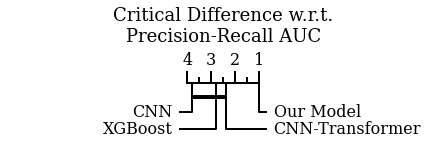

In [17]:
with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    draw_cd_diagram(to_cd_diag.reset_index(), alpha=0.1, labels=False,title="Critical Difference w.r.t.\nPrecision-Recall AUC")
plt.savefig("./reports/kdd2022/crit_diff.pdf", bbox_inches="tight")

In [18]:
auc_rankings = 4  - pretty_table.xs('ROC AUC', axis=1, level=-1, drop_level=True).rank().mean(axis=1)

In [19]:
import scikit_posthocs as sp
data = pretty_table.xs('ROC AUC', axis=1, level=-1, drop_level=True)
print(data.index)
sp.posthoc_nemenyi_friedman(data.values.T)

Index(['XGBoost', 'CNN', 'CNN-Transformer', 'Our Model'], dtype='object', name='model_clean')


,0,1,2,3
0,1.000000,0.900000,0.900000,0.068212
1,0.900000,1.000000,0.735188,0.017331
2,0.900000,0.735188,1.000000,0.203530
3,0.068212,0.017331,0.203530,1.000000
